In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
dataset = 'cifar10'
model = 'resnet50'
loss = 'dual_focal_loss_gra'
save_loc = "/home/jinxulin/UQ/model/" + dataset + '-' + model + '-' + loss + "/epoch/"

all_bin_stats = []

# 循环读取文件并追加到列表
for i in range(50, 400, 50):  # 注意：结束值应设置为400以包含350
    save_name = str(i) + '_bin_stats.npy'
    loaded_bin_stats = np.load(save_loc + save_name)
    print(loaded_bin_stats.sum())
    all_bin_stats.append(loaded_bin_stats)

# 将列表中的数组堆叠成一个新的 NumPy 数组
combined_bin_stats = np.stack(all_bin_stats, axis=0)


10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0


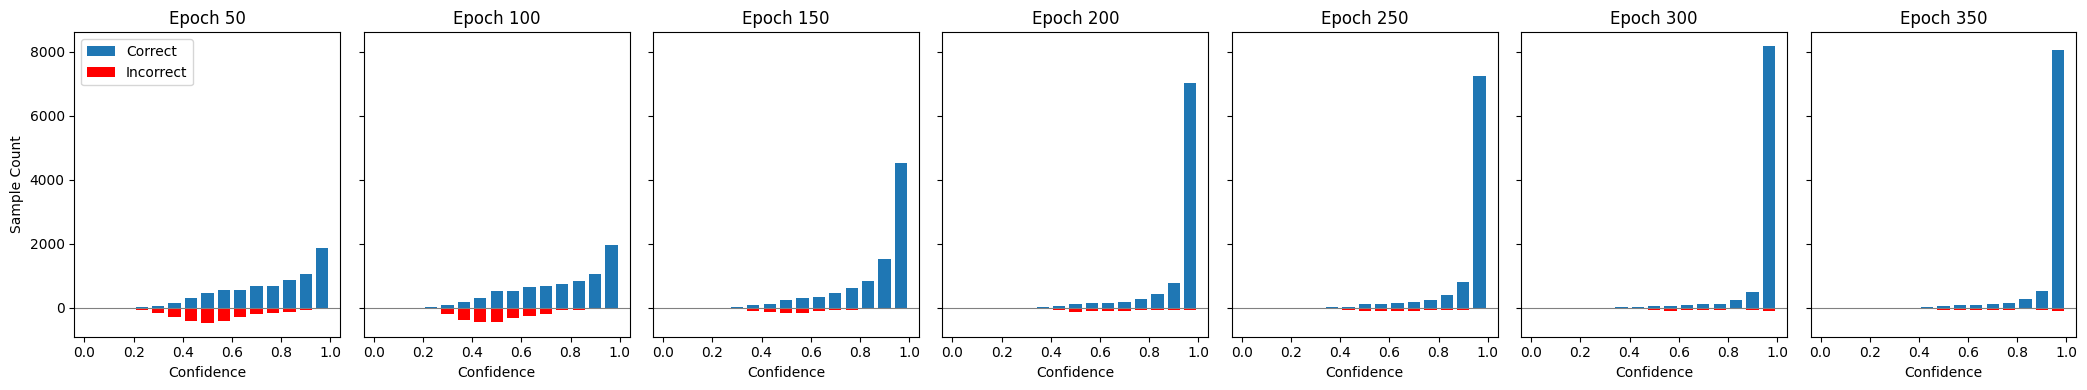

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 combined_bin_stats 是您之前创建的数组，形状为 (7, n_bins, 2)
epochs = [50, 100, 150, 200, 250, 300, 350]
n_bins = combined_bin_stats.shape[1]  # 获取 bin 的数量
confidence_levels = np.linspace(0, 1, n_bins + 1)[:-1] + 0.5 / n_bins  # 中心置信度水平

# 创建一个画布和多个子图
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(21, 4), sharey=True)  # 共享 Y 轴

# 绘制每个 epoch 的数据
for ax, epoch_stats, epoch in zip(axes, combined_bin_stats, epochs):
    correct_counts = epoch_stats[:, 0]
    incorrect_counts = -epoch_stats[:, 1]  # 用负值表示错误分类的数量

    ax.bar(confidence_levels, correct_counts, width=0.05, label='Correct')
    ax.bar(confidence_levels, incorrect_counts, width=0.05, label='Incorrect', color='red')
    
    ax.set_title(f'Epoch {epoch}')
    ax.set_xlabel('Confidence')
    if ax is axes[0]:  # 只在第一个子图上添加 Y 轴标签
        ax.set_ylabel('Sample Count')
    ax.axhline(0, color='gray', linewidth=0.8)  # 添加 Y=0 的参考线

# 添加图例
axes[0].legend(loc='upper left')

# 调整子图之间的间隔
plt.tight_layout()

# 显示图表
plt.show()

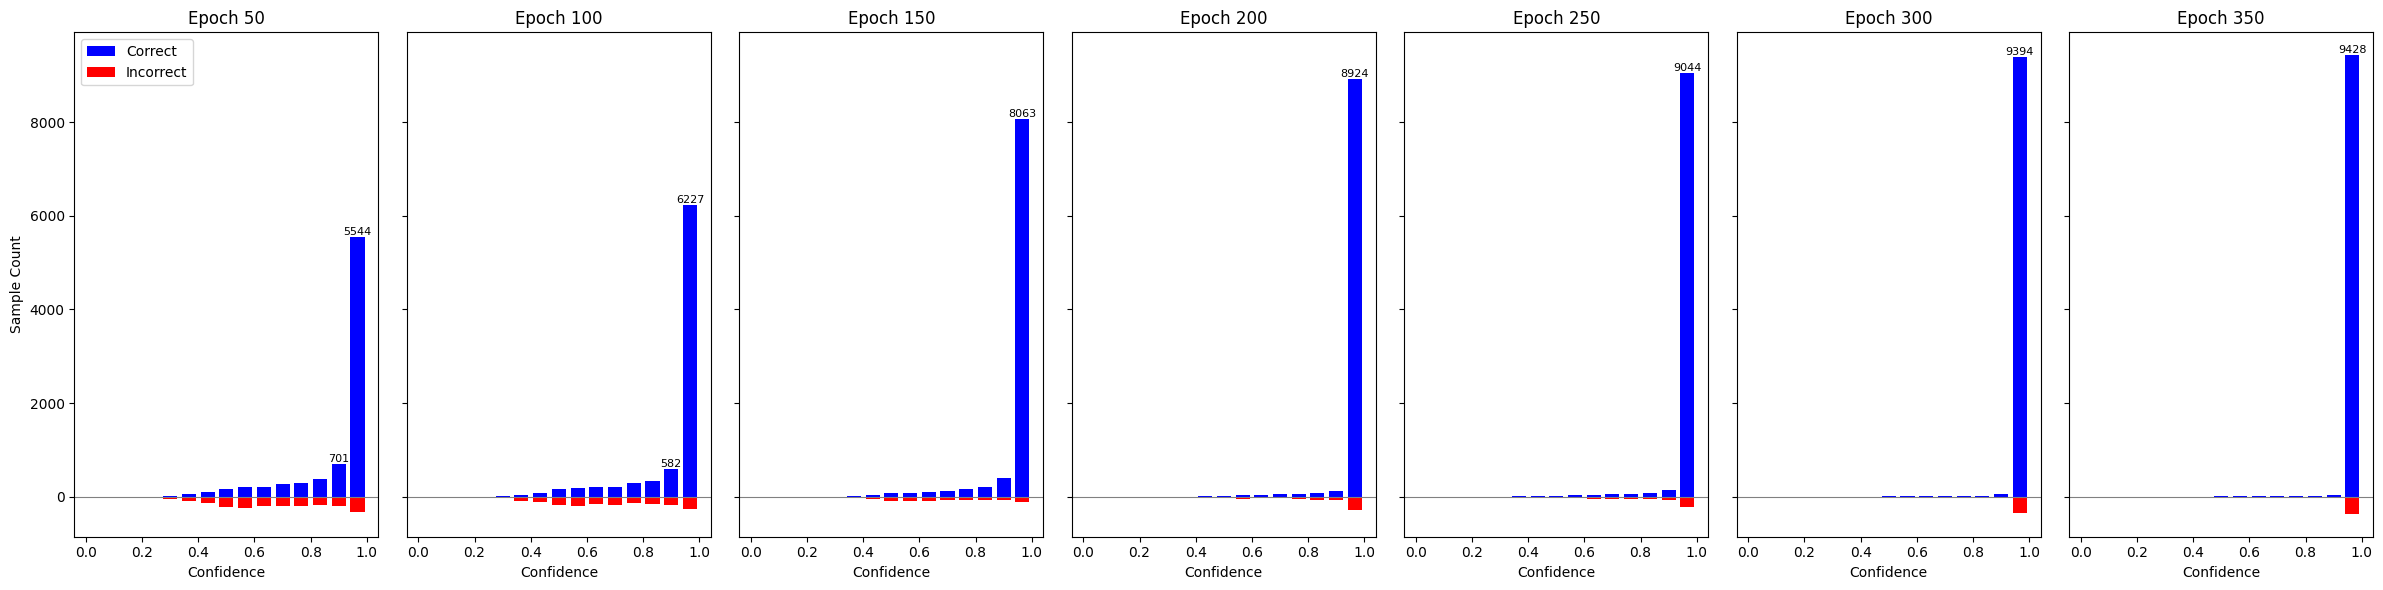

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 combined_bin_stats 是您之前创建的数组，形状为 (7, n_bins, 2)
epochs = [50, 100, 150, 200, 250, 300, 350]
n_bins = combined_bin_stats.shape[1]
confidence_levels = np.linspace(0, 1, n_bins + 1)[:-1] + 0.5 / n_bins

# 创建一个画布和多个子图
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(24, 6), sharey=True)  # 调整图的整体大小

# 绘制每个 epoch 的数据
for ax, epoch_stats, epoch in zip(axes, combined_bin_stats, epochs):
    correct_counts = epoch_stats[:, 0]
    incorrect_counts = -epoch_stats[:, 1]  # 使用负值表示错误分类的数量

    # 绘制正确的样本柱状图
    rects1 = ax.bar(confidence_levels, correct_counts, width=0.05, label='Correct', color='blue')
    # 绘制错误的样本柱状图
    rects2 = ax.bar(confidence_levels, incorrect_counts, width=0.05, label='Incorrect', color='red')
    
    # 在柱状图上添加文本，只有数量较大时显示
    for rect in rects1:
        height = rect.get_height()
        if height > 500:  # 仅当柱子高于500时显示数字
            ax.text(rect.get_x() + rect.get_width() / 2., height,
                    '%d' % int(height),
                    ha='center', va='bottom', fontsize=8)  # 调整字体大小

    for rect in rects2:
        height = rect.get_height()
        if height < -500:  # 仅当柱子低于-500时显示数字
            ax.text(rect.get_x() + rect.get_width() / 2., height,
                    '%d' % int(-height),
                    ha='center', va='top', fontsize=8)  # 调整字体大小

    ax.set_title(f'Epoch {epoch}')
    ax.set_xlabel('Confidence')
    if ax is axes[0]:
        ax.set_ylabel('Sample Count')
    ax.axhline(0, color='gray', linewidth=0.8)

# 添加图例
axes[0].legend(loc='upper left')

# 调整子图之间的间隔
plt.tight_layout()

# 显示图表
plt.show()



/tmp/ipykernel_2127859/925387002.py:9: RuntimeWarning: invalid value encountered in divide
  accuracy = last_epoch_stats[:, 0] / (last_epoch_stats[:, 0] + last_epoch_stats[:, 1])


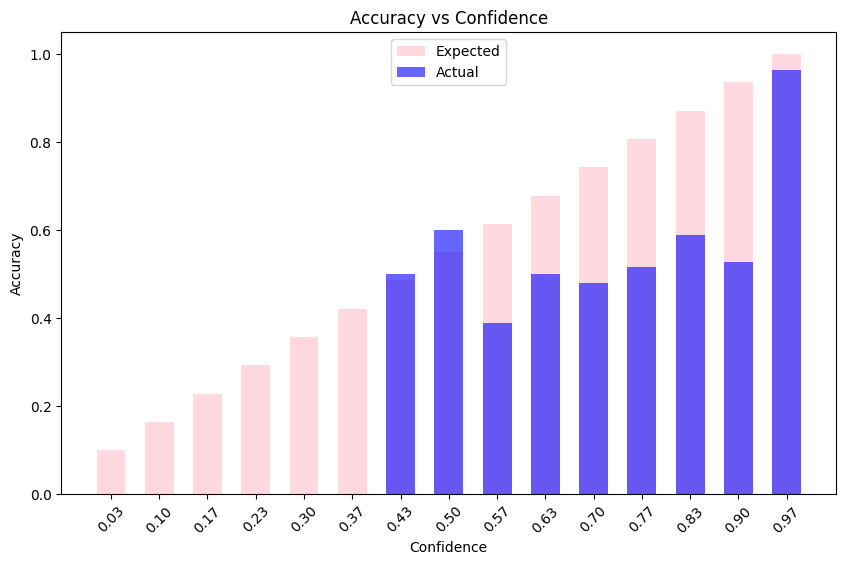

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 combined_bin_stats 的形状是 (7, n_bins, 2)
# 获取最后一个 epoch 的数据
last_epoch_stats = combined_bin_stats[-1]

# 计算准确率：正确分类的样本数除以总样本数
accuracy = last_epoch_stats[:, 0] / (last_epoch_stats[:, 0] + last_epoch_stats[:, 1])

# 置信度区间的中点，用于作为x轴的标签
n_bins = last_epoch_stats.shape[0]
confidence_intervals = np.linspace(0, 1, n_bins + 1)[:-1] + 0.5 / n_bins

# 模拟期望准确率为一个从0.1到1线性增长的序列
expected_accuracy = np.linspace(0.1, 1.0, n_bins)

# 创建图表
plt.figure(figsize=(10, 6))
bar_width = 0.04  # 设置柱子的宽度

# 绘制期望准确率柱状图
plt.bar(confidence_intervals, expected_accuracy, width=bar_width, color='pink', alpha=0.6, align='center', label='Expected')
# 绘制实际准确率柱状图
plt.bar(confidence_intervals, accuracy, width=bar_width, color='blue', alpha=0.6, align='center', label='Actual')

# 添加图表标题和标签
plt.title("Accuracy vs Confidence")
plt.xlabel("Confidence")
plt.ylabel("Accuracy")
plt.xticks(confidence_intervals, labels=[f"{x:.2f}" for x in confidence_intervals], rotation=45)  # 格式化标签以显示两位小数
plt.legend()

# 显示图表
plt.show()





In [25]:
for row in combined_bin_stats[-1]:
    if row.sum() != 0:
        acc = row[0] / row.sum()
    else:
        acc = 0
    print("[" + " ".join(f"{int(x):5d}" for x in row) + " " + str(acc) + "]")

[    0     0 0]
[    0     0 0]
[    0     0 0]
[    2     0 1.0]
[    3     9 0.25]
[   10    18 0.35714287]
[   29    28 0.50877196]
[   66    63 0.5116279]
[   81    75 0.5192308]
[   98    54 0.6447368]
[  112    66 0.6292135]
[  159    57 0.7361111]
[  273    43 0.863924]
[  541    58 0.90317196]
[ 8072    83 0.9898222]
